In [64]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, log_loss, make_scorer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as scs
import seaborn as sn
import pandas as pd

In [106]:
df = pd.read_csv('grad.csv')
df.tail()

,admit,gre,gpa,rank
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2
399,0,600,3.89,3


In [107]:
y = df.admit
X = df[['gre','gpa','rank']]
X.head()

,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
2,800,4.00,1
3,640,3.19,4
4,520,2.93,4


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [109]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)

In [110]:
knn.predict(X_test)[0]

1

In [111]:
model = LogisticRegression(solver='lbfgs').fit(X_train,y_train)

In [112]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [113]:
p_hat = model.predict_proba(X)[:,1]

In [114]:
roc_auc_score(y, p_hat)

0.6721900147096997

In [115]:
pd.crosstab(df['admit'], df['rank']) 

rank,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


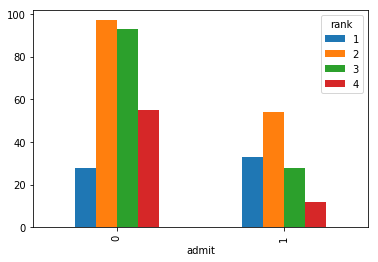

In [116]:
pd.crosstab(df['admit'], df['rank']).plot(kind='bar')

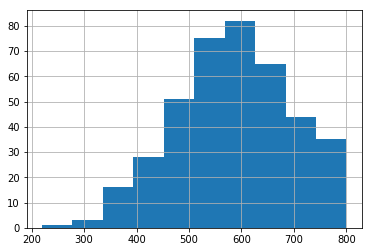

In [117]:
df.gre.hist()

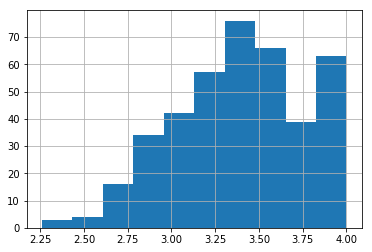

In [118]:
df.gpa.hist()

In [119]:
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

C:\Users\e0wrvbu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\e0wrvbu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\e0wrvbu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


# GridSearch

In [120]:
score = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
params = {'solver':['lbfgs','liblinear', 'sag', 'saga'], 'penalty':['l2']}
gs = GridSearchCV(LogisticRegression(), param_grid=params, scoring = score, cv=10, n_jobs=5).fit(X_train, y_train)
gs

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'solver': ['lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True),
       verbose=0)

In [121]:
gs.best_score_

-0.5790091448735609

In [122]:
gs.best_params_

{'penalty': 'l2', 'solver': 'sag'}

In [123]:
gs.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [124]:
df = df.join(pd.get_dummies(df['rank']))
df.head()

,admit,gre,gpa,rank,1,2,3,4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [131]:
df.columns

Index(['admit', 'gre', 'gpa', 'rank', 1, 2, 3, 4], dtype='object')

In [132]:
X = df[['gre','gpa',1,2,3]]
y = df.admit

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [135]:
model = LogisticRegression(solver='lbfgs').fit(X_train,y_train)

In [136]:
p_hat = model.predict_proba(X)[:,1]

In [137]:
roc_auc_score(y, p_hat)

0.6850249488044763

In [138]:
score = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
params = {'solver':['lbfgs','liblinear', 'sag', 'saga'], 'penalty':['l2']}
gs = GridSearchCV(LogisticRegression(), param_grid=params, scoring = score, cv=10, n_jobs=5).fit(X_train, y_train)

C:\Users\e0wrvbu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [139]:
gs.best_score_

-0.6140326020132274

In [140]:
gs.best_params_

{'penalty': 'l2', 'solver': 'lbfgs'}

In [141]:
gs.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [144]:
fpr, tpr, thr = roc_curve(y, p_hat)
auc = roc_auc_score(y, p_hat)

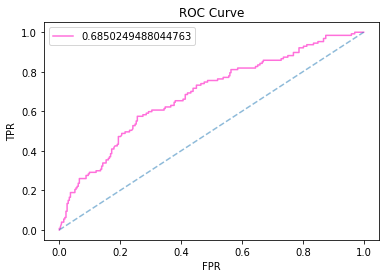

In [145]:
plt.plot(fpr, tpr, label=auc, color='#ff33cc', alpha=0.7)
plt.plot(np.linspace(0,1), np.linspace(0,1), linestyle='--', alpha=0.5)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()